# Sleep health and lifestyle 

## Dataset
### sleep health and lifestyle dataset

The dataset that I'm working with is taken from Laksika Tharmalingam's [Sleep Health and Lifestyle Dataset ](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)on Kaggle. It comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

## Import Pandas and Get Data

In [3]:
import pandas as pd

In [4]:
sleep_df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', delimiter=",", encoding='utf-8')

## Overview

First, have a look at the general information. 

In [5]:
sleep_df.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
221,222,Male,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
269,270,Female,49,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
308,309,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
224,225,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia
292,293,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
180,181,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,None
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
79,80,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None
314,315,Female,52,Engineer,8.4,9,30,3,Normal,125/80,65,5000,None


In [9]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


I found Blood Pressure is identified as an object in Pandas, but it is a continuous numerical variable. So I will transform it into integers by separating it into 2 variables (Systolic_blood_pressure and Diastolic_blood_pressure), allowing for a more granular analysis. 

In [ ]:
df['object_column'] = df['int_column'].astype(str).astype(int)

In [7]:
# Split the values into two columns
sleep_df[['Systolic_blood_pressure', 'Diastolic_blood_pressure']] = sleep_df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop the original 'Blood Pressure' column 
sleep_df.drop('Blood Pressure', axis=1, inplace=True)

In [9]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Person ID                 374 non-null    int64  
 1   Gender                    374 non-null    object 
 2   Age                       374 non-null    int64  
 3   Occupation                374 non-null    object 
 4   Sleep Duration            374 non-null    float64
 5   Quality of Sleep          374 non-null    int64  
 6   Physical Activity Level   374 non-null    int64  
 7   Stress Level              374 non-null    int64  
 8   BMI Category              374 non-null    object 
 9   Heart Rate                374 non-null    int64  
 10  Daily Steps               374 non-null    int64  
 11  Sleep Disorder            374 non-null    object 
 12  Systolic_blood_pressure   374 non-null    int32  
 13  Diastolic_blood_pressure  374 non-null    int32  
dtypes: float64

array([[<AxesSubplot:title={'center':'Person ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sleep Duration'}>],
       [<AxesSubplot:title={'center':'Quality of Sleep'}>,
        <AxesSubplot:title={'center':'Physical Activity Level'}>,
        <AxesSubplot:title={'center':'Stress Level'}>],
       [<AxesSubplot:title={'center':'Heart Rate'}>,
        <AxesSubplot:title={'center':'Daily Steps'}>,
        <AxesSubplot:title={'center':'Systolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'Diastolic_blood_pressure'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

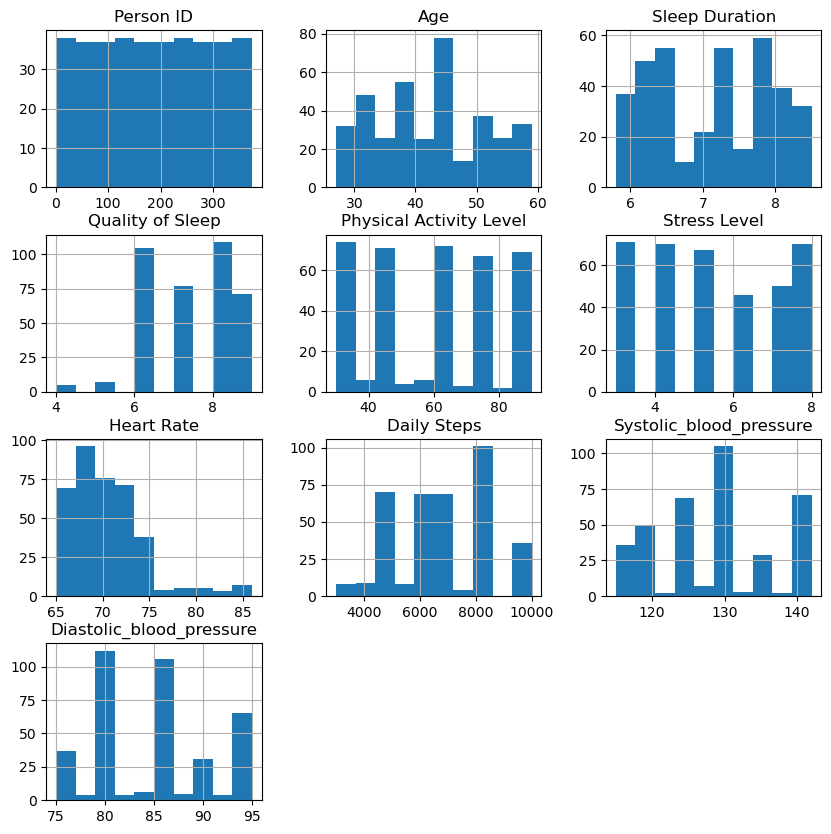

In [10]:
sleep_df.hist(figsize=(10,10))

It provides general information about the participants, ranging from 30 to 60 years old. The majority are around 45 years old, and most people report a sleep duration of 6 to 8 hours. Overall, participants generally perceive their sleep quality as good(over 6), with heart rates concentrated in the range of 65 to 75.

## An exploratory data analysis 

Given that the previous histogram did not reveal significant trends, I plan to conduct a more nuanced analysis by examining the data in groups. After specifying the data type, I observed the emergence of four variables. Among these, I am keen to explore the potential relationships between sleep and physical activity patterns and the categorical variables: Gender, Occupation, and BMI. 

In [16]:
sleep_df.describe(include=['object'])

,Gender,Occupation,BMI Category,Sleep Disorder
count,374,374,374,374
unique,2,11,4,3
top,Male,Nurse,Normal,None
freq,189,73,195,219


In [37]:
sleep_df.groupby('Gender')[['Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level']].mean() 

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level
Gender,,,,
Female,7.229730,7.664865,59.140541,4.675676
Male,7.036508,6.968254,59.201058,6.079365


According to the statistical results, females appear to experience better sleep and male appear to have a slight higher physical activity level.

In [39]:
Occupation = sleep_df.groupby('Occupation')[['Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level']].mean() 

<AxesSubplot:xlabel='Occupation'>

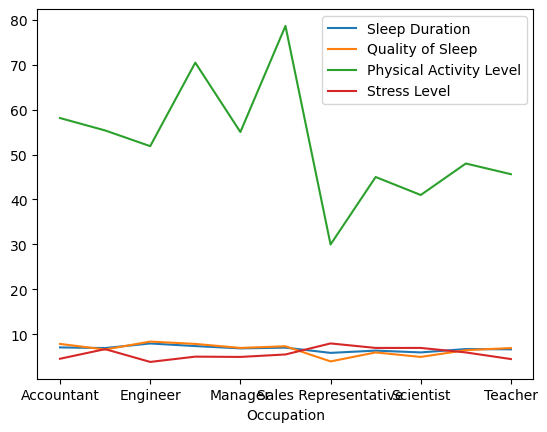

In [45]:
Occupation.plot()

In [48]:
# to look at detail information of Physical Activity Level
sleep_df.groupby('Occupation')['Physical Activity Level'].mean().sort_values(ascending=False)

Occupation
Nurse                   78.589041
Lawyer                  70.425532
Accountant              58.108108
Doctor                  55.352113
Manager                 55.000000
Engineer                51.857143
Software Engineer       48.000000
Teacher                 45.625000
Salesperson             45.000000
Scientist               41.000000
Sales Representative    30.000000
Name: Physical Activity Level, dtype: float64

According to the plot, there is minimal variation in the sleeping condition and stress level among different occupations. However, there is a significant difference in physical activity levels. Nurses and lawyers have physical activity levels that are more than twice as high as those of sales representatives.

In [49]:
BMI = sleep_df.groupby('BMI Category')[['Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level']].mean() 

<AxesSubplot:xlabel='BMI Category'>

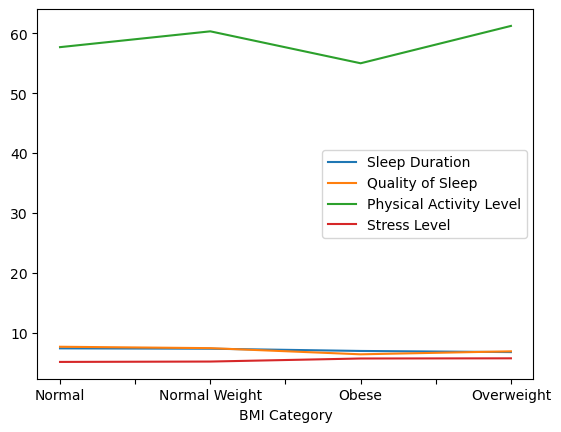

In [51]:
BMI.plot()

According to the plot, there is no significant relationship between the job positions and four variables. However, I noticed that 'normal weight' and 'normal' could be combined into a single category. And I want to explore whether weight is associated with stress and exercises.

In [56]:
sleep_df['BMI Category'].replace({'Normal Weight': 'Normal'}, inplace=True)

In [60]:
# Filter the DataFrame for only characters labeled as `Overweight`
overweight_filter = sleep_df['BMI Category'] == 'Overweight'
overweight_df = sleep_df[overweight_filter]
# Filter the DataFrame for only characters labeled as `Normal`
Normal_filter = sleep_df['BMI Category'] == 'Normal'
Normal_df = sleep_df[Normal_filter]
# Filter the DataFrame for only characters labeled as `Obese`
Obese_filter = sleep_df['BMI Category'] == 'Obese'
Obese_df = sleep_df[Obese_filter]

In [68]:
overweight = overweight_df.groupby('Stress Level')['Physical Activity Level'].mean().reset_index()
Normal = Normal_df.groupby('Stress Level')['Physical Activity Level'].mean().reset_index()
Obese = Obese_df.groupby('Stress Level')['Physical Activity Level'].mean().reset_index()

<AxesSubplot:xlabel='Stress Level'>

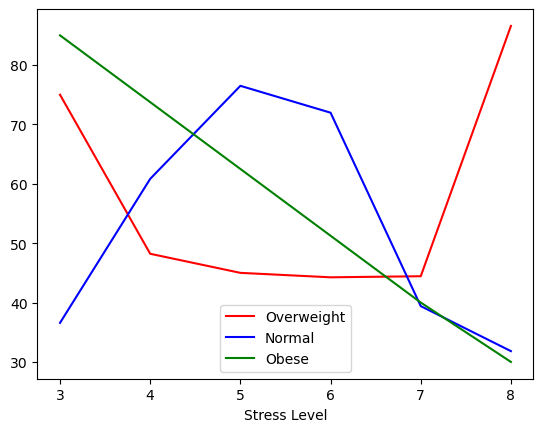

In [72]:
ax = overweight.plot(kind='line', x='Stress Level', y='Physical Activity Level', color='red',  label='Overweight')
Normal.plot(ax=ax, kind='line', x='Stress Level', y='Physical Activity Level', color='blue', label='Normal')
Obese.plot(ax=ax, kind='line', x='Stress Level', y='Physical Activity Level', color='green', label='Obese')

For different weight categories, the trend varies. Among the obese, higher stress levels seem to correlate with lower exercise engagement. For the remaining two categories, the relationships are more intricate.